In [1]:
import keras

Using TensorFlow backend.


In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
from keras.datasets.mnist import load_data
# ((訓練題目, 訓練答案), (測試題目, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [6]:
# 一定要做步驟: 看一下訓練資料測試資料有幾筆
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


3


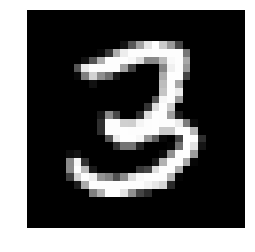

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print(y_train[c])
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [12]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,153,70,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,9,...,253,253,119,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,17,83,174,...,249,253,168,0,0,0,0,0,0,0
7,0,0,0,0,0,0,85,234,254,253,...,240,253,151,0,0,0,0,0,0,0
8,0,0,0,0,0,0,9,127,210,142,...,254,254,68,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,17,0,...,253,168,0,0,0,0,0,0,0,0


In [14]:
# 資料預處理
# 1. 題目預處理(Normalize)
# Keras在準備隨機那組weights, 跟Normalize的圖片比較搭
# 1. 第一種方式: 0 - 1  第二種方式: -1 - 1 
# 攤開 -> Keras MLP 規定一定要攤開成為1D
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255
# DEMO
x_train_shape[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     